## Advanced Regression

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

**The company wants to know:**

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

 

### Business Goal

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# Importing all the required libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')

### Importing dataset and overview

In [2]:
# importing dataset
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
housing = pd.read_csv("train.csv")
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# Viewing percent wise null values
100*housing.isnull().sum()/len(housing.index)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [6]:
# Viewing columns having null values
housing.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinSF1       False
BsmtFinType2      True
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
1stFlrSF   

## Data Cleaning

In [7]:
# Dropping following columms 
# Id - A unique record number
# Alley', 'PoolQC', 'MiscFeature' - Majority of values are null
housing.drop(columns=['Id', 'Alley', 'PoolQC', 'MiscFeature'], inplace=True)

In [8]:
# checking null values in categorical columns

housing.select_dtypes(include='object').isnull().sum()[housing.select_dtypes(include='object').isnull().sum() > 0]

MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
Fence           1179
dtype: int64

In [9]:
# Replacing na with 'None' in the following columns:

emptyCols = ('MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
             'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish',
            'GarageQual', 'GarageCond', 'Fence')

for i in emptyCols:
    housing[i] = housing[i].fillna('None')

In [10]:
# checking for null values in numerical columns

housing.select_dtypes(include=['int64', 'float64']).isnull().sum()[housing.select_dtypes(include=['int64', 'float64']).isnull().sum() > 0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [11]:
# Replacing null values with Median for LotFrontage and MasVnrArea
housing['LotFrontage'] = housing['LotFrontage'].replace(np.nan, housing['LotFrontage'].median())
housing['MasVnrArea'] = housing['MasVnrArea'].replace(np.nan, housing['MasVnrArea'].median())

# Replacing the null value for GarageYrBlt to 0 and changing column type from float to int
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna(0)
housing['GarageYrBlt'] = housing['GarageYrBlt'].astype(int)

In [12]:
# Checking again for null values in categorical columns

housing.select_dtypes(include='object').isnull().sum()[housing.select_dtypes(include='object').isnull().sum() > 0]

Series([], dtype: int64)

In [13]:
# Checking again for null values in numerical columns

housing.select_dtypes(include=['int64', 'float64']).isnull().sum()[housing.select_dtypes(include=['int64', 'float64']).isnull().sum() > 0]

Series([], dtype: int64)

In [14]:
# Dropping categorical columns having one value more than 90%

percent = (len(housing) * 90) / 100

def highUniqueVal():
    col = []
    categorical_columns = housing.select_dtypes(include=['object'])
    for i in (categorical_columns):
        if(housing[i].value_counts().max() >= percent):
            col.append(i)
    return col

highValCols = highUniqueVal()

print('Columns with one value more than 90%:\n', highValCols)
housing.drop(columns=highValCols, inplace=True)

Columns with one value more than 90%:
 ['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageCond', 'PavedDrive']


In [15]:
# Dropping numerical columns having one value more than 90%

def highUniqueVal():
    col = []
    categorical_columns = housing.select_dtypes(include=['int64', 'float'])
    for i in (categorical_columns):
        if(housing[i].value_counts().max() >= percent):
            col.append(i)
    return col

highValCols = highUniqueVal()

print('Columns with one value more than 90%:\n', highValCols)
housing.drop(columns=highValCols, inplace=True)

Columns with one value more than 90%:
 ['LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [16]:
housing.shape

(1460, 59)

### Outlier Treatment

In [17]:
# Checking outliers at 25%,50%,75%,90%,95% and above

housing.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,1.565068,0.382877,2.866438,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,46.660274,21.954110,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.550916,0.502885,0.815778,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,66.256028,61.119149,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,2.000000,1.000000,3.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,8.000000,2009.000000,214000.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,2158.300000,1.000000,2.000000,1.000000,4.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,10.000000,2010.000000,278000.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,2466.100000,1.000000,2.000000,1.000000,4.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,11.000000,2010.000000,326100.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,3123.480000,2.000000,3.000000,1.000000,5.000000,11.000000,2.000000,2009.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,12.000000,2010.000000,442567.010000


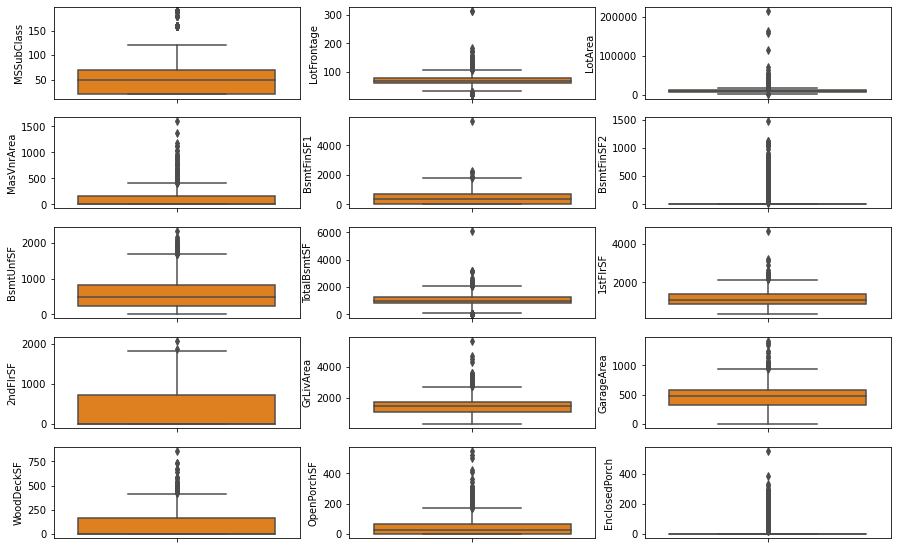

In [18]:
# Plotting the numeric columns to see outliers 

plt.figure(figsize=(15, 30))
plt.subplot(15,3,1)
sns.boxplot(y = 'MSSubClass', palette='autumn', data = housing)
plt.subplot(15,3,2)
sns.boxplot(y = 'LotFrontage', palette='autumn', data = housing)
plt.subplot(15,3,3)
sns.boxplot(y = 'LotArea', palette='autumn', data = housing)
plt.subplot(15,3,4)
sns.boxplot(y = 'MasVnrArea', palette='autumn', data = housing)
plt.subplot(15,3,5)
sns.boxplot(y = 'BsmtFinSF1', palette='autumn', data = housing)
plt.subplot(15,3,6)
sns.boxplot(y = 'BsmtFinSF2', palette='autumn', data = housing)
plt.subplot(15,3,7)
sns.boxplot(y = 'BsmtUnfSF', palette='autumn', data = housing)
plt.subplot(15,3,8)
sns.boxplot(y = 'TotalBsmtSF', palette='autumn', data = housing)
plt.subplot(15,3,9)
sns.boxplot(y = '1stFlrSF', palette='autumn', data = housing)
plt.subplot(15,3,10)
sns.boxplot(y = '2ndFlrSF', palette='autumn', data = housing)
plt.subplot(15,3,11)
sns.boxplot(y = 'GrLivArea', palette='autumn', data = housing)
plt.subplot(15,3,12)
sns.boxplot(y = 'GarageArea', palette='autumn', data = housing)
plt.subplot(15,3,13)
sns.boxplot(y = 'WoodDeckSF', palette='autumn', data = housing)
plt.subplot(15,3,14)
sns.boxplot(y = 'OpenPorchSF', palette='autumn', data = housing)
plt.subplot(15,3,15)
sns.boxplot(y = 'EnclosedPorch', palette='autumn', data = housing)
plt.show()

**Most of the numeric columns have outliers and dropping them will cause lost of important data. We can try to treat them with IQR using minimum and maximum values.**

In [19]:
# Handling the outliers using IQR for following numerical columns
num_cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 
            'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
            'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch']

for i in num_cols:
    IQR = housing[i].quantile(.75) - housing[i].quantile(.25)
    max_val = housing[i].quantile(.75) + 1.5*IQR
    min_val = housing[i].quantile(.25) - 1.5*IQR
    housing[i][housing[i] > max_val] = max_val
    housing[i][housing[i] < min_val] = min_val

In [20]:
# Checking the numerical columns again after applying the minimum and maximum on outliers

housing.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000
mean,55.085616,69.090411,9647.388014,6.099315,5.575342,1971.267808,1984.865753,89.406336,439.997517,0.0,563.777740,1050.254795,1157.018151,346.789041,1503.735873,0.425342,1.565068,0.382877,2.866438,6.517808,0.613014,1868.739726,1.767123,470.670719,91.806849,42.603425,0.0,6.321918,2007.815753,180921.195890
std,37.508183,17.231909,3594.356399,1.382997,1.112799,30.202904,20.645407,134.017553,433.219435,0.0,431.710214,397.937878,362.583002,435.791621,481.375641,0.518911,0.550916,0.502885,0.815778,1.625393,0.644666,453.697295,0.747315,207.105729,116.658120,52.501584,0.0,2.703626,1.328095,79442.502883
min,20.000000,31.500000,1481.500000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.0,0.000000,42.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.0,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,0.0,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.0,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.0,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.0,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,2.000000,1.000000,3.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.0,8.000000,2009.000000,214000.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,0.0,1232.000000,1602.200000,1680.000000,954.200000,2158.300000,1.000000,2.000000,1.000000,4.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,0.0,10.000000,2010.000000,278000.000000
95%,145.000000,104.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,410.625000,1274.000000,0.0,1468.000000,1753.000000,1831.250000,1141.050000,2466.100000,1.000000,2.000000,1.000000,4.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,170.000000,0.0,11.000000,2010.000000,326100.000000
99%,145.000000,107.500000,17673.500000,10.000000,9.000000,2009.000000,2009.000000,410.625000,1572.410000,0.0,1685.500000,2052.000000,2155.125000,1418.920000,2747.625000,2.000000,3.000000,1.000000,5.000000,11.000000,2.000000,2009.000000,3.000000,938.250000,420.000000,170.000000,0.0,12.000000,2010.000000,442567.010000


**After treating the outliers, we can see that values in BsmtFinSF2 and EnclosedPorch columns became 0.0. Since these features are not going to beneficial in model building, we can drop these columns.**

In [21]:
# dropping BsmtFinSF2 and EnclosedPorch columns
housing.drop(columns=['BsmtFinSF2', 'EnclosedPorch'], inplace=True)

housing.shape

(1460, 57)

### Data Visualization

In [22]:
# checking correlation of numerical features

cor = housing.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.399010,-0.403395,0.063390,-0.067686,0.055306,0.058578,0.034657,-0.076423,-0.132790,-0.251190,-0.259517,0.330582,0.098235,-0.002577,0.150567,0.204110,-0.025834,0.053067,-0.029667,-0.056747,-0.016038,-0.085825,-0.009879,0.001883,-0.003956,-0.021216,-0.063602
LotFrontage,-0.399010,1.000000,0.579385,0.244012,-0.059725,0.139948,0.077565,0.210284,0.144167,0.149535,0.336444,0.392061,0.069358,0.341141,0.061655,0.192438,0.062837,0.267952,0.333654,0.225637,0.117992,0.309457,0.345119,0.102325,0.147060,0.017264,0.006479,0.371542
LotArea,-0.403395,0.579385,1.000000,0.221454,-0.018512,0.065671,0.054472,0.144086,0.215825,0.087068,0.361769,0.458118,0.121725,0.433877,0.119547,0.213848,0.099300,0.285791,0.393846,0.352384,0.147793,0.308919,0.344650,0.198311,0.162026,0.003855,-0.036831,0.432216
OverallQual,0.063390,0.244012,0.221454,1.000000,-0.091932,0.572323,0.550684,0.413520,0.229576,0.301613,0.541357,0.473842,0.294675,0.597066,0.111098,0.550600,0.273458,0.101676,0.427452,0.396765,0.288998,0.600671,0.568557,0.246389,0.358047,0.070815,-0.027347,0.790982
OverallCond,-0.067686,-0.059725,-0.018512,-0.091932,1.000000,-0.375983,0.073741,-0.136032,-0.044464,-0.135753,-0.180581,-0.146649,0.029159,-0.090879,-0.054942,-0.194149,-0.060769,0.012980,-0.057583,-0.023820,-0.006515,-0.185758,-0.149269,-0.002253,-0.057378,-0.003511,0.043950,-0.077856
YearBuilt,0.055306,0.139948,0.065671,0.572323,-0.375983,1.000000,0.592855,0.345695,0.252874,0.144190,0.409571,0.287776,0.009948,0.212840,0.187599,0.468271,0.242656,-0.070651,0.095589,0.147716,0.272029,0.537850,0.486953,0.237983,0.261530,0.012398,-0.013618,0.522897
YearRemodAdd,0.058578,0.077565,0.054472,0.550684,0.073741,0.592855,1.000000,0.185138,0.126339,0.178277,0.301581,0.246660,0.140013,0.296841,0.119470,0.439046,0.183331,-0.040581,0.191740,0.112581,0.146357,0.420622,0.377331,0.222702,0.280916,0.021490,0.035743,0.507101
MasVnrArea,0.034657,0.210284,0.144086,0.413520,-0.136032,0.345695,0.185138,1.000000,0.247185,0.108669,0.355451,0.336554,0.143482,0.361094,0.097127,0.273167,0.198840,0.118364,0.280444,0.248334,0.150624,0.383699,0.384180,0.161904,0.172885,0.008498,0.002687,0.448618
BsmtFinSF1,-0.076423,0.144167,0.215825,0.229576,-0.044464,0.252874,0.126339,0.247185,1.000000,-0.524935,0.467355,0.395393,-0.157613,0.138405,0.662312,0.052879,-0.005136,-0.113574,0.020704,0.247712,0.119406,0.230396,0.278350,0.209159,0.088830,-0.004769,0.013968,0.400330
BsmtUnfSF,-0.132790,0.149535,0.087068,0.301613,-0.135753,0.144190,0.178277,0.108669,-0.524935,1.000000,0.427672,0.317715,0.008717,0.245858,-0.427138,0.286866,-0.042212,0.167109,0.246955,0.048741,0.042703,0.209174,0.178489,-0.009997,0.150560,0.036607,-0.042775,0.203278


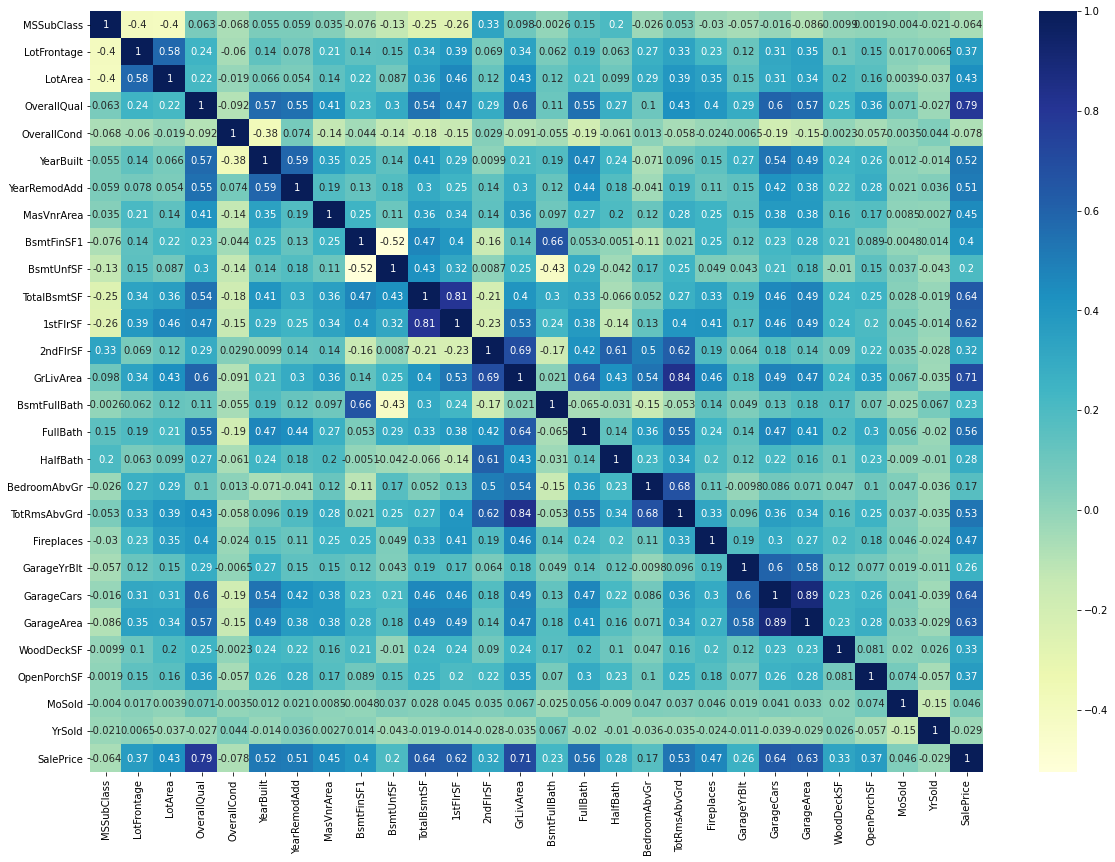

In [23]:
# plotting correlations on a heatmap

plt.figure(figsize=(20,14))

sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

**From the above correlation table and plot we can see some independent variables are highly correlated to each other. We can drop one of the variable from each pair to avoid multicollinearity in our model. These variables are as follows:**

    - GarageCars and GarageArea (89%)
    - GrLivArea and TotRmsAbvGrd (84%)
    - 1stFlrSF and TotalBsmtSF (81%)

**We can also see that features like OverallQual, GrLivArea, GarageCars have high positive correlation with the target variable SalePrice.**

In [24]:
# dropping highly correlated variables which we discovered above in the heatmap

housing.drop(columns=['GarageCars', 'TotRmsAbvGrd', 'TotalBsmtSF'], inplace=True)

housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,150.0,Ex,856.0,854,1710.0,1,2,1,3,Gd,0,None,Attchd,2003,RFn,548.0,TA,0,61,None,2,2008,WD,Normal,208500
1,20,RL,80.0,9600.0,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,284.0,Ex,1262.0,0,1262.0,0,2,0,3,TA,1,TA,Attchd,1976,RFn,460.0,TA,298,0,None,5,2007,WD,Normal,181500
2,60,RL,68.0,11250.0,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,434.0,Ex,920.0,866,1786.0,1,2,1,3,Gd,1,TA,Attchd,2001,RFn,608.0,TA,0,42,None,9,2008,WD,Normal,223500
3,70,RL,60.0,9550.0,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,540.0,Gd,961.0,756,1717.0,1,1,0,3,Gd,1,Gd,Detchd,1998,Unf,642.0,TA,0,35,None,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260.0,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,490.0,Ex,1145.0,1053,2198.0,1,2,1,4,Gd,1,TA,Attchd,2000,RFn,836.0,TA,192,84,None,12,2008,WD,Normal,250000


In [25]:
housing.shape

(1460, 54)

<Figure size 1080x2160 with 0 Axes>

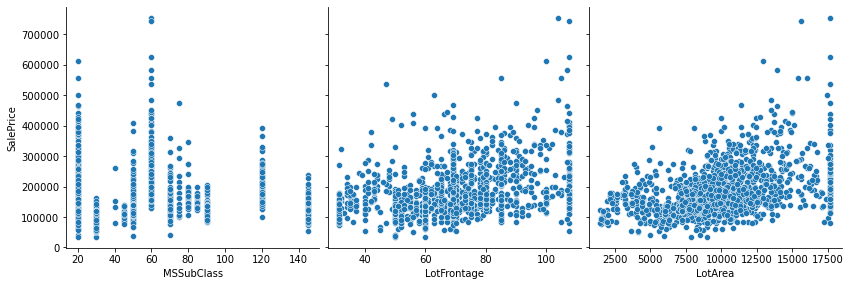

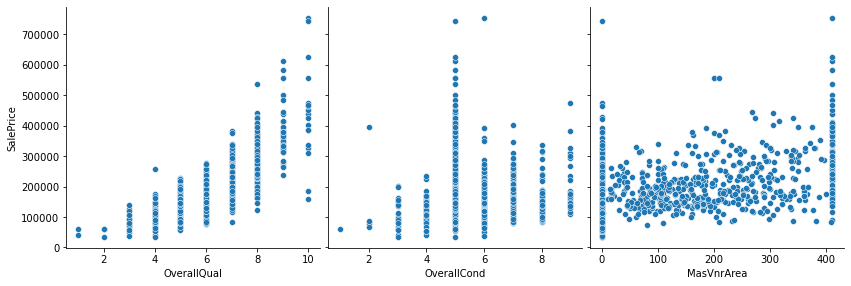

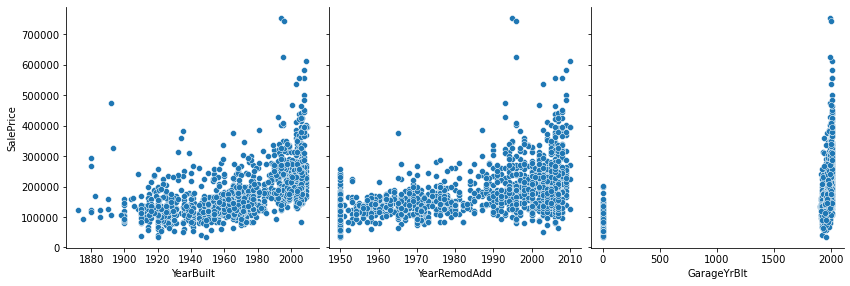

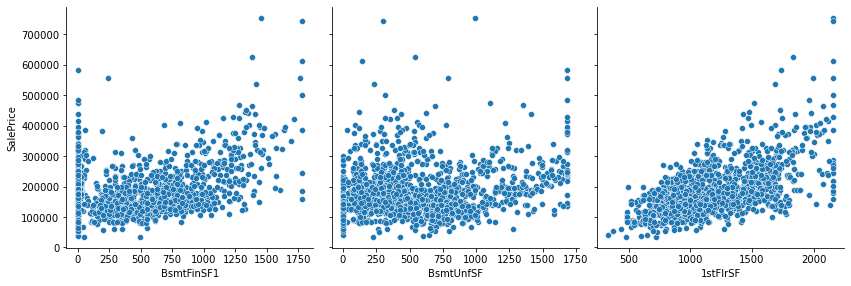

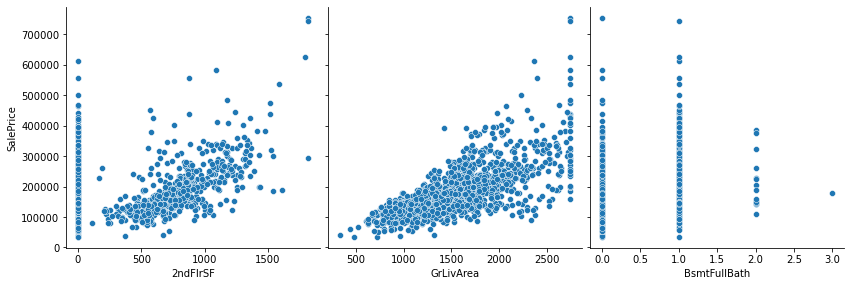

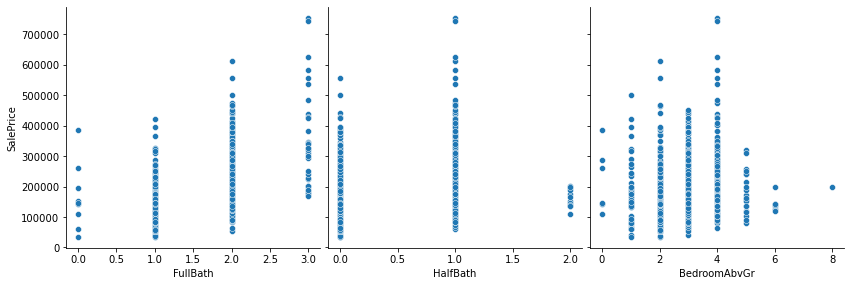

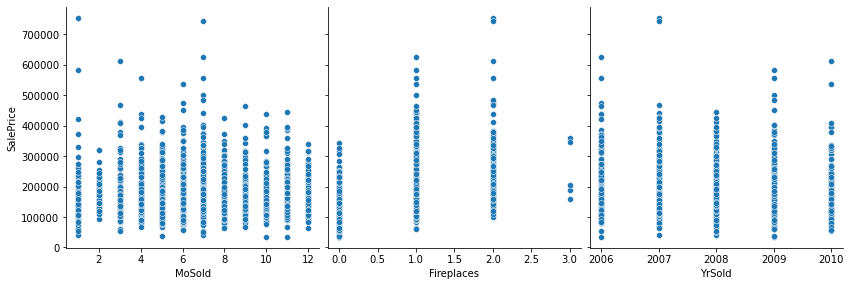

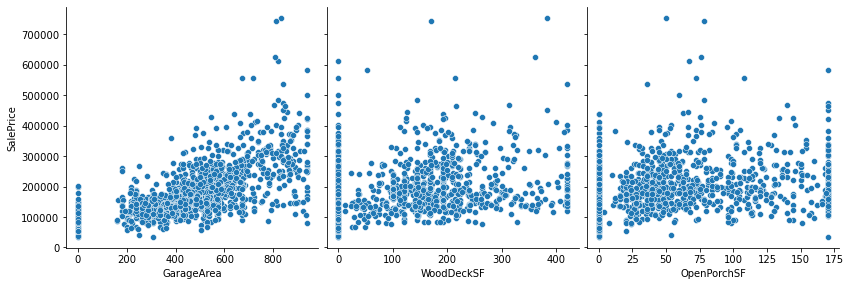

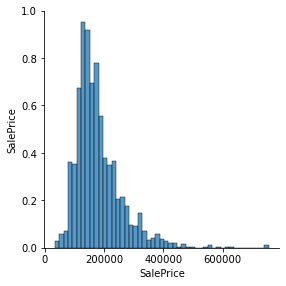

In [26]:
# visualizing the numerical values using pairplots

plt.figure(figsize=(15, 30))
sns.pairplot(housing, x_vars=['MSSubClass', 'LotFrontage', 'LotArea'], y_vars='SalePrice', height=4, aspect=1, kind='scatter')
sns.pairplot(housing, x_vars=['OverallQual', 'OverallCond', 'MasVnrArea'], y_vars='SalePrice', height=4, aspect=1, kind='scatter')
sns.pairplot(housing, x_vars=['YearBuilt', 'YearRemodAdd', 'GarageYrBlt'], y_vars='SalePrice', height=4, aspect=1, kind='scatter')
sns.pairplot(housing, x_vars=['BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF'], y_vars='SalePrice', height=4, aspect=1, kind='scatter')
sns.pairplot(housing, x_vars=['2ndFlrSF', 'GrLivArea', 'BsmtFullBath'], y_vars='SalePrice', height=4, aspect=1, kind='scatter')
sns.pairplot(housing, x_vars=['FullBath', 'HalfBath', 'BedroomAbvGr'], y_vars='SalePrice', height=4, aspect=1, kind='scatter')
sns.pairplot(housing, x_vars=['MoSold', 'Fireplaces', 'YrSold'], y_vars='SalePrice', height=4, aspect=1, kind='scatter')
sns.pairplot(housing, x_vars=['GarageArea', 'WoodDeckSF', 'OpenPorchSF'], y_vars='SalePrice', height=4, aspect=1, kind='scatter')
sns.pairplot(housing, x_vars=['SalePrice'], y_vars='SalePrice', height=4, aspect=1, kind='scatter')
plt.show()


**Above pairplots provide us the following information:**

- LotArea, 1stFlrSF, GrLivArea, GarageArea seems is showing positive correlation with target feature
- We can also see where the OverallQual and OverallCond is better, the SalePrice is also high
- Rest of features are too scattered 

In [27]:
housing.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,150.0,Ex,856.0,854,1710.0,1,2,1,3,Gd,0,None,Attchd,2003,RFn,548.0,TA,0,61,None,2,2008,WD,Normal,208500
1,20,RL,80.0,9600.0,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,284.0,Ex,1262.0,0,1262.0,0,2,0,3,TA,1,TA,Attchd,1976,RFn,460.0,TA,298,0,None,5,2007,WD,Normal,181500
2,60,RL,68.0,11250.0,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,434.0,Ex,920.0,866,1786.0,1,2,1,3,Gd,1,TA,Attchd,2001,RFn,608.0,TA,0,42,None,9,2008,WD,Normal,223500
3,70,RL,60.0,9550.0,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,540.0,Gd,961.0,756,1717.0,1,1,0,3,Gd,1,Gd,Detchd,1998,Unf,642.0,TA,0,35,None,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260.0,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,490.0,Ex,1145.0,1053,2198.0,1,2,1,4,Gd,1,TA,Attchd,2000,RFn,836.0,TA,192,84,None,12,2008,WD,Normal,250000


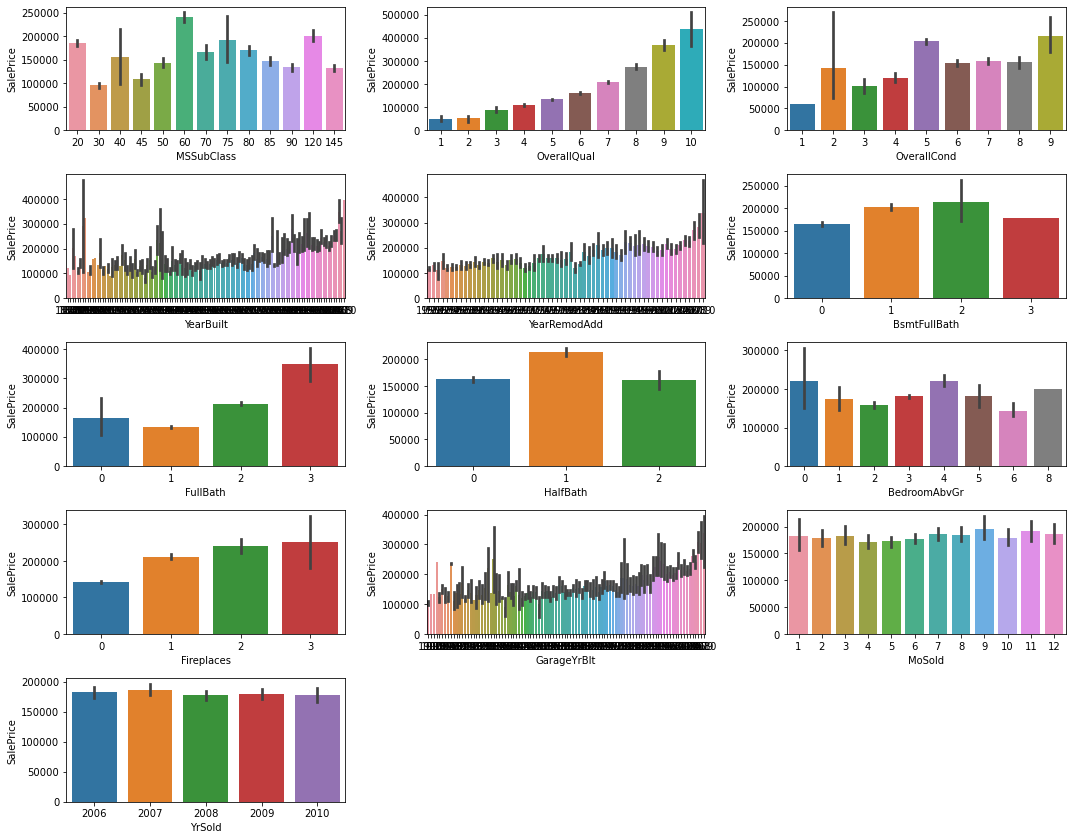

In [28]:
# visualizing the numerical features having discrete values

discreteFeatures = ['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath',
          'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageYrBlt', 'MoSold', 'YrSold']

plt.figure(figsize=(15, 30))

for i in range(len(discreteFeatures)):
    plt.subplot(13, 3, i+1)
    plt.subplots_adjust(hspace=2.0)
    sns.barplot(housing[discreteFeatures[i]], housing['SalePrice'])
    plt.tight_layout()


**The above plots provide us following information:**

- SalePrice is increasing with the OverallQual
- YearBuilt and YearRemodAdd also impacting the Sale Price
- FullBath 2 and 3 have hight Sale Price
- SalePrice inscreasing with the number of Fireplaces 
- MoSold and YrSold doesn't showing any trend

In [29]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,150.0,Ex,856.0,854,1710.0,1,2,1,3,Gd,0,None,Attchd,2003,RFn,548.0,TA,0,61,None,2,2008,WD,Normal,208500
1,20,RL,80.0,9600.0,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,284.0,Ex,1262.0,0,1262.0,0,2,0,3,TA,1,TA,Attchd,1976,RFn,460.0,TA,298,0,None,5,2007,WD,Normal,181500
2,60,RL,68.0,11250.0,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,434.0,Ex,920.0,866,1786.0,1,2,1,3,Gd,1,TA,Attchd,2001,RFn,608.0,TA,0,42,None,9,2008,WD,Normal,223500
3,70,RL,60.0,9550.0,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,540.0,Gd,961.0,756,1717.0,1,1,0,3,Gd,1,Gd,Detchd,1998,Unf,642.0,TA,0,35,None,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260.0,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,490.0,Ex,1145.0,1053,2198.0,1,2,1,4,Gd,1,TA,Attchd,2000,RFn,836.0,TA,192,84,None,12,2008,WD,Normal,250000


#### Plotting Unordered Categorical Features

MSZoning, LandContour, LotConfig, Neighborhood, Condition1, BldgType, RoofStyle, Exterior1st, Exterior2nd, MasVnrType, Foundation, GarageType, SaleType, SaleCondition

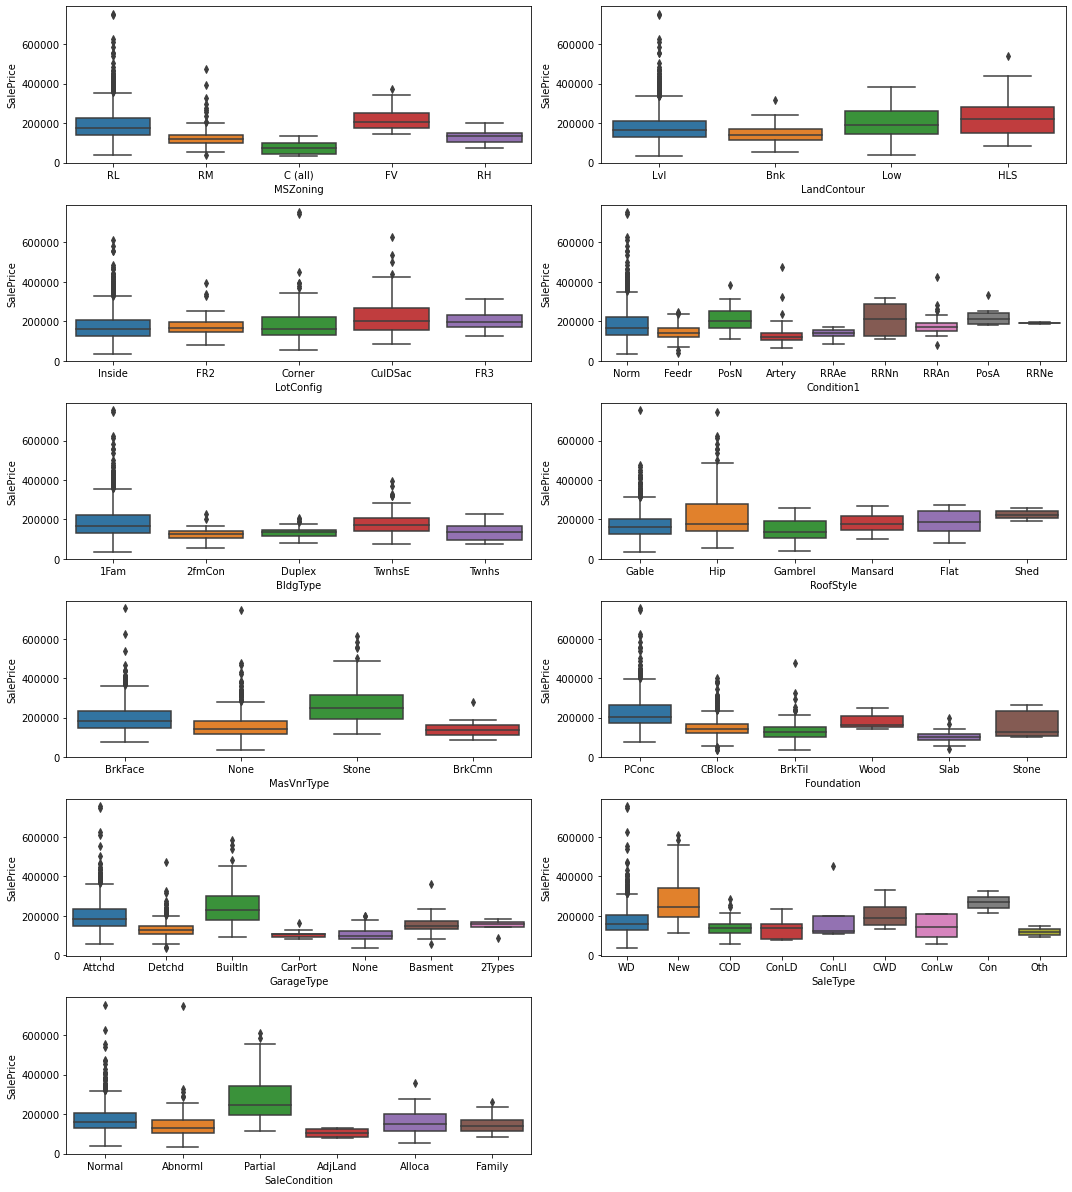

In [30]:
# plotting unordered categorical features

unordered1 = ['MSZoning', 'LandContour', 'LotConfig', 'Condition1',
             'BldgType', 'RoofStyle', 'MasVnrType', 'Foundation', 
              'GarageType', 'SaleType', 'SaleCondition']

plt.figure(figsize=(15, 30))

for i in range(len(unordered1)):
    plt.subplot(11, 2, i+1)
    plt.subplots_adjust(hspace=2.0)
    sns.boxplot(housing[unordered1[i]], housing['SalePrice'])
    plt.tight_layout()
    

**Above boxplots provide us following information:**

- 'MSZoning' - Houses in RL (Resdiential Low Density) zone have higher prices
- 'LandContour - In LandContour, houses near flat/leve 'Lvl' have higher prices
- 'Condition1' - Houses with Norm (Normal) conditions have higher prices
- 'BldgType' - 1Fam (Single-family Detached) houses have higher prices than other types
- 'RoofStyle' - Houses with Hip style roof have higher prices
- 'Foundation' - Houses with PConc (Poured Concrete) have high values 
- 'GarageType' - Houses with Attached garage are have high prices

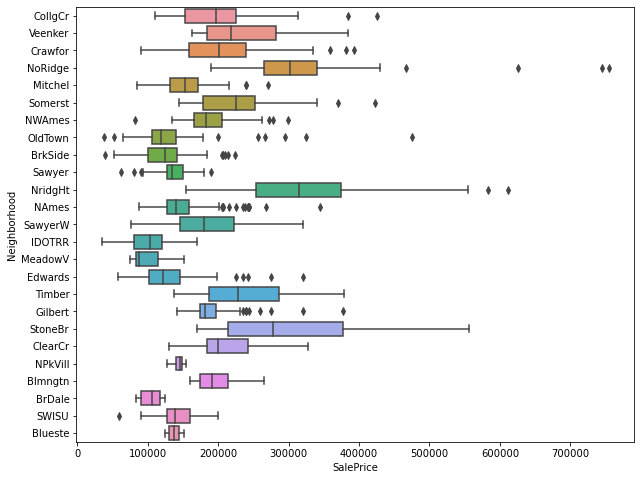

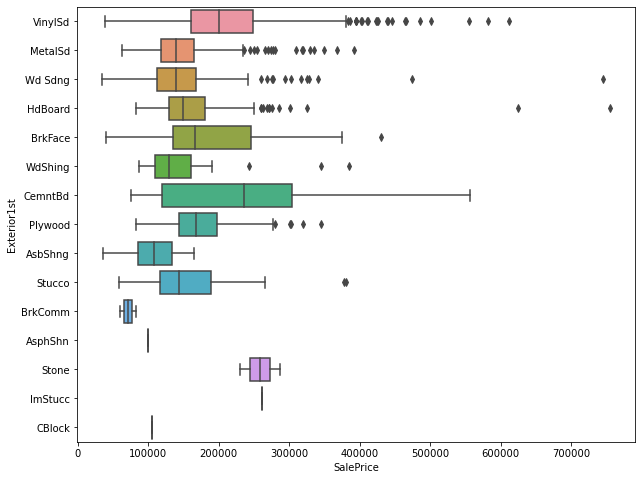

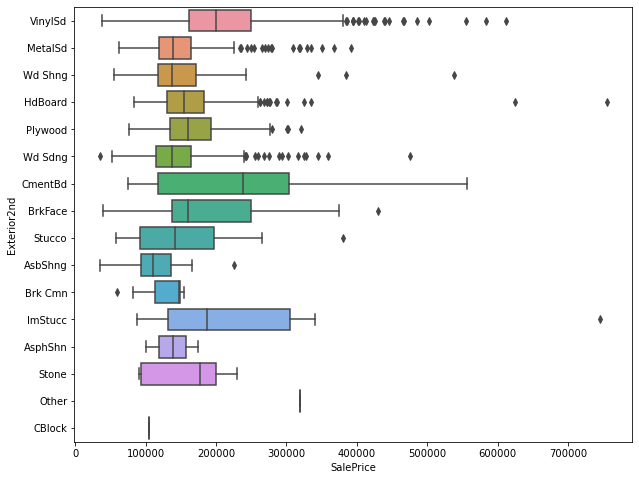

In [31]:
# Plotting unordered categorical features having many values
    
plt.figure(figsize=[10,8])
sns.boxplot(housing['SalePrice'], housing['Neighborhood'])
plt.show()

plt.figure(figsize=[10,8])
sns.boxplot(housing['SalePrice'], housing['Exterior1st'])
plt.show()

plt.figure(figsize=[10,8])
sns.boxplot(housing['SalePrice'], housing['Exterior2nd'])
plt.show()

#### Plotting Ordered Categorical Features

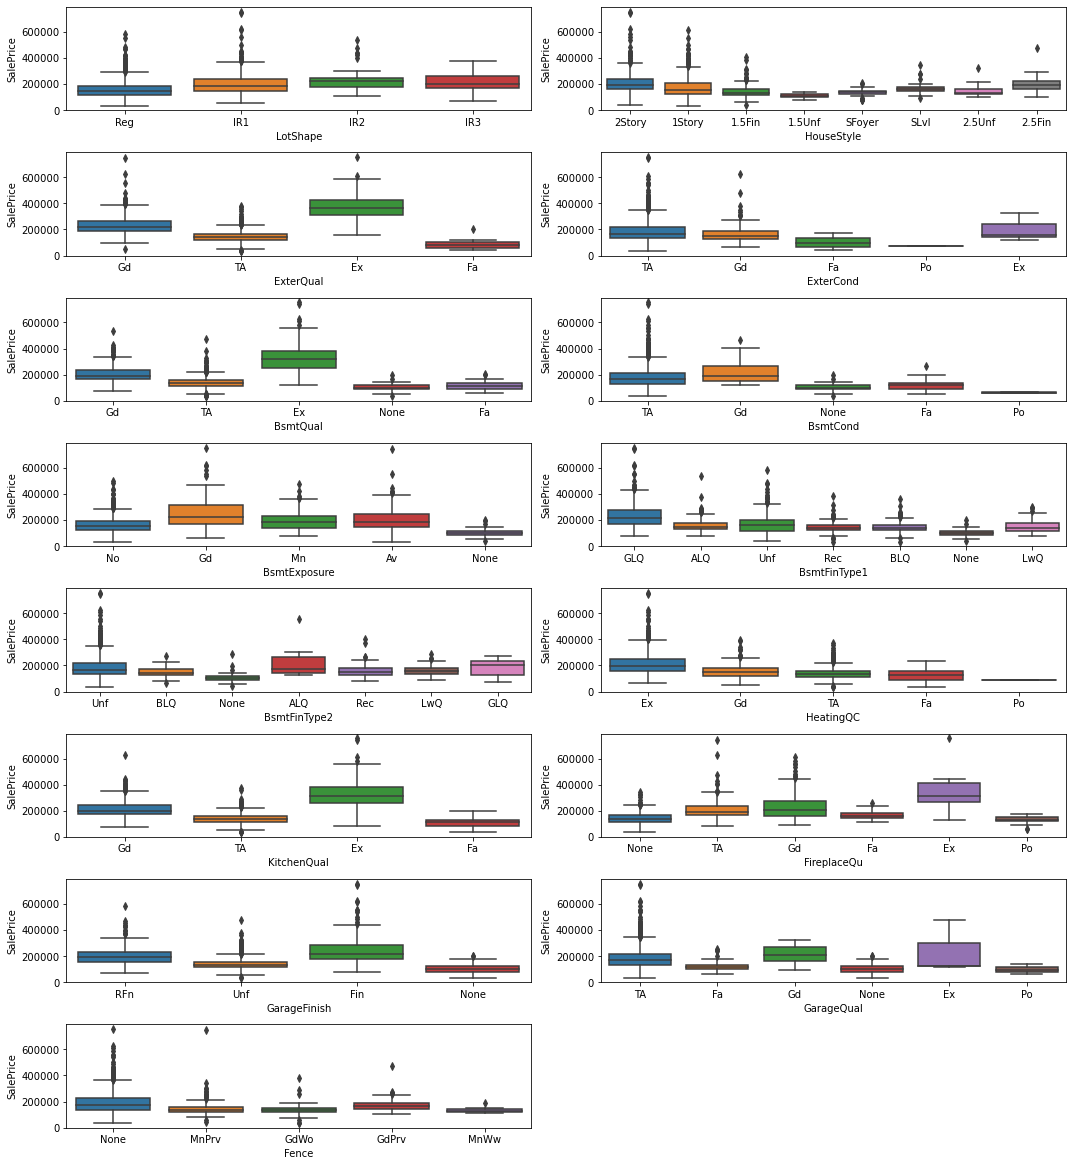

In [32]:
# plotting ordered categorical features

ordered = ['LotShape', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
           'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 
           'FireplaceQu', 'GarageFinish', 'GarageQual', 'Fence']

plt.figure(figsize=(15, 30))

for i in range(len(ordered)):
    plt.subplot(15, 2, i+1)
    plt.subplots_adjust(hspace=2.0)
    sns.boxplot(housing[ordered[i]], housing['SalePrice'])
    plt.tight_layout()
    

**Above boxplots provide us following information:**

- 'LotShape' - Houses in IR1 (Slightly irregular) shape have higher prices
- 'HouseStyle - 2 Story houses have higher prices
- 'ExterQual' - Houses with Excellent and Good conditions have higher prices
- 'BsmtQual' - Houses with Excellent basement quality have good prices
- 'BsmtFinType1' - Houses with GLQ (Good Living Quarters) basement rating have higher prices
- 'HeatingQC' - Houses with Excellent heating quality have high SalePrice
- 'KitchenQual' - Houses with Excellent Kitech quality have high Sale Prices
- 'GarageFinsh' - Houses with Finished interior garage have higher sale prices

### Preparing the data for modeling

#### Converting Ordered Categorical data into numerical data

'LotShape', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
           'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 
           'FireplaceQu', 'GarageFinish', 'GarageQual', 'Fence'

In [33]:
# Converting ordered categorical features into numerical values

housing['LotShape'] = housing['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
housing['HouseStyle'] = housing['HouseStyle'].map({'SLvl': 7, 'SFoyer': 6, '2.5Fin': 5, '2.5Unf': 4, 
                                                   '2Story': 3, '1.5Fin': 2, '1.5Unf': 1, '1Story': 0})
housing['ExterQual'] = housing['ExterQual'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
housing['ExterCond'] = housing['ExterCond'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
housing['BsmtQual'] = housing['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing['BsmtCond'] = housing['BsmtCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing['BsmtExposure'] = housing['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
housing['BsmtFinType1'] = housing['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 
                                                       'LwQ': 2, 'Unf': 1, 'None': 0})
housing['BsmtFinType2'] = housing['BsmtFinType2'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 
                                                       'LwQ': 2, 'Unf': 1, 'None': 0})
housing['HeatingQC'] = housing['HeatingQC'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
housing['KitchenQual'] = housing['KitchenQual'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
housing['FireplaceQu'] = housing['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing['GarageFinish'] = housing['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
housing['GarageQual'] = housing['GarageQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 
                                                   'Fa': 2, 'Po': 1, 'None':0 })
housing['Fence'] = housing['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })

housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,3,Lvl,Inside,CollgCr,Norm,1Fam,3,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4,3,1,6,706.0,1,150.0,4,856.0,854,1710.0,1,2,1,3,3,0,0,Attchd,2003,2,548.0,3,0,61,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600.0,3,Lvl,FR2,Veenker,Feedr,1Fam,0,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,2,2,CBlock,4,3,4,5,978.0,1,284.0,4,1262.0,0,1262.0,0,2,0,3,2,1,3,Attchd,1976,2,460.0,3,298,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250.0,2,Lvl,Inside,CollgCr,Norm,1Fam,3,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,3,2,PConc,4,3,2,6,486.0,1,434.0,4,920.0,866,1786.0,1,2,1,3,3,1,3,Attchd,2001,2,608.0,3,0,42,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550.0,2,Lvl,Corner,Crawfor,Norm,1Fam,3,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,2,2,BrkTil,3,4,1,5,216.0,1,540.0,3,961.0,756,1717.0,1,1,0,3,3,1,4,Detchd,1998,1,642.0,3,0,35,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260.0,2,Lvl,FR2,NoRidge,Norm,1Fam,3,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,3,2,PConc,4,3,3,6,655.0,1,490.0,4,1145.0,1053,2198.0,1,2,1,4,3,1,3,Attchd,2000,2,836.0,3,192,84,0,12,2008,WD,Normal,250000


**Creating dummy variables from unordered categorical features**

In [34]:
# Creating dummy variables from categorical features

dummyList = ['MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 
              'BldgType', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
              'Foundation', 'GarageType', 'SaleType', 'SaleCondition']

for i in dummyList:
    i = pd.get_dummies(housing[i], prefix=i, drop_first=True)
    housing = pd.concat([housing, i], axis=1)
    

In [35]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,Fence,MoSold,...,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,65.0,8450.0,3,Lvl,Inside,CollgCr,Norm,1Fam,3,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4,3,1,6,706.0,1,150.0,4,856.0,854,1710.0,1,2,1,3,3,0,0,Attchd,2003,2,548.0,3,0,61,0,2,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,RL,80.0,9600.0,3,Lvl,FR2,Veenker,Feedr,1Fam,0,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,2,2,CBlock,4,3,4,5,978.0,1,284.0,4,1262.0,0,1262.0,0,2,0,3,2,1,3,Attchd,1976,2,460.0,3,298,0,0,5,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,RL,68.0,11250.0,2,Lvl,Inside,CollgCr,Norm,1Fam,3,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,3,2,PConc,4,3,2,6,486.0,1,434.0,4,920.0,866,1786.0,1,2,1,3,3,1,3,Attchd,2001,2,608.0,3,0,42,0,9,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,RL,60.0,9550.0,2,Lvl,Corner,Crawfor,Norm,1Fam,3,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,2,2,BrkTil,3,4,1,5,216.0,1,540.0,3,961.0,756,1717.0,1,1,0,3,3,1,4,Detchd,1998,1,642.0,3,0,35,0,2,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,RL,84.0,14260.0,2,Lvl,FR2,NoRidge,Norm,1Fam,3,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,3,2,PConc,4,3,3,6,655.0,1,490.0,4,1145.0,1053,2198.0,1,2,1,4,3,1,3,Attchd,2000,2,836.0,3,192,84,0,12,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [36]:
# dropping the categorical features as we have new derived columns

housing.drop(columns=dummyList, inplace=True)

housing.head()

,MSSubClass,LotFrontage,LotArea,LotShape,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,Fence,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,...,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,3,3,7,5,2003,2003,196.0,3,2,4,3,1,6,706.0,1,150.0,4,856.0,854,1710.0,1,2,1,3,3,0,0,2003,2,548.0,3,0,61,0,2,2008,208500,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600.0,3,0,6,8,1976,1976,0.0,2,2,4,3,4,5,978.0,1,284.0,4,1262.0,0,1262.0,0,2,0,3,2,1,3,1976,2,460.0,3,298,0,0,5,2007,181500,0,0,1,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250.0,2,3,7,5,2001,2002,162.0,3,2,4,3,2,6,486.0,1,434.0,4,920.0,866,1786.0,1,2,1,3,3,1,3,2001,2,608.0,3,0,42,0,9,2008,223500,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550.0,2,3,7,5,1915,1970,0.0,2,2,3,4,1,5,216.0,1,540.0,3,961.0,756,1717.0,1,1,0,3,3,1,4,1998,1,642.0,3,0,35,0,2,2006,140000,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260.0,2,3,8,5,2000,2000,350.0,3,2,4,3,3,6,655.0,1,490.0,4,1145.0,1053,2198.0,1,2,1,4,3,1,3,2000,2,836.0,3,192,84,0,12,2008,250000,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


### Splitting the data set into train-test

In [37]:
# Saving all the features in X except the target variable 'SalePrice'

X = housing.drop('SalePrice', axis=1)
housing.head()

,MSSubClass,LotFrontage,LotArea,LotShape,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,Fence,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,...,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,3,3,7,5,2003,2003,196.0,3,2,4,3,1,6,706.0,1,150.0,4,856.0,854,1710.0,1,2,1,3,3,0,0,2003,2,548.0,3,0,61,0,2,2008,208500,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600.0,3,0,6,8,1976,1976,0.0,2,2,4,3,4,5,978.0,1,284.0,4,1262.0,0,1262.0,0,2,0,3,2,1,3,1976,2,460.0,3,298,0,0,5,2007,181500,0,0,1,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250.0,2,3,7,5,2001,2002,162.0,3,2,4,3,2,6,486.0,1,434.0,4,920.0,866,1786.0,1,2,1,3,3,1,3,2001,2,608.0,3,0,42,0,9,2008,223500,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550.0,2,3,7,5,1915,1970,0.0,2,2,3,4,1,5,216.0,1,540.0,3,961.0,756,1717.0,1,1,0,3,3,1,4,1998,1,642.0,3,0,35,0,2,2006,140000,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260.0,2,3,8,5,2000,2000,350.0,3,2,4,3,3,6,655.0,1,490.0,4,1145.0,1053,2198.0,1,2,1,4,3,1,3,2000,2,836.0,3,192,84,0,12,2008,250000,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


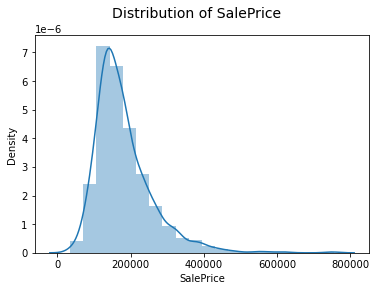

In [38]:
# Plotting the distribution of target variable

fig = plt.figure()
sns.distplot((housing['SalePrice']), bins=20)
fig.suptitle('Distribution of SalePrice', fontsize=14)            # plot heading
plt.show()

**SalePrice have Right (Positive) skewness.**

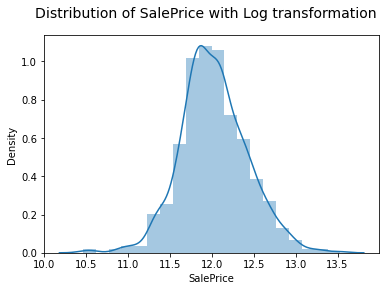

In [39]:
# Let's check distribution with log transformation on SalePrice

fig = plt.figure()
sns.distplot(np.log(housing['SalePrice']), bins=20)
fig.suptitle('Distribution of SalePrice with Log transformation', fontsize=14)            # plot heading
plt.show()

**With Log transformation, SalePrice shows normally distributed.**

In [40]:
# Applying the transformation on SalePrice and saving it to y

y = np.log(housing['SalePrice'])
y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [41]:
# splitting the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [42]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,Fence,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,...,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,30,67.0,5604.0,3,0,5,6,1925,1950,0.0,2,2,3,3,1,3,468.0,1,396.0,2,864.0,0,864.0,1,1,0,2,2,0,0,0,0,0.0,0,0,0,0,4,2008,0,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
318,60,90.0,9900.0,3,3,7,5,1993,1993,256.0,3,2,4,3,4,6,987.0,1,360.0,4,1372.0,1274,2646.0,1,2,1,4,3,1,3,1993,2,656.0,3,340,60,0,4,2009,0,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
239,50,52.0,8741.0,3,2,6,4,1945,1950,0.0,2,2,3,2,1,2,94.0,1,641.0,2,798.0,689,1487.0,0,1,1,3,2,1,4,1949,1,220.0,3,0,140,2,4,2010,0,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
986,50,59.0,5310.0,3,2,6,8,1910,2003,0.0,2,3,3,2,1,1,0.0,1,485.0,3,1001.0,634,1635.0,0,1,0,2,3,0,0,1950,1,255.0,2,394,0,0,6,2006,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1416,145,60.0,11340.0,3,3,4,6,1885,1950,0.0,2,2,3,3,1,1,0.0,1,777.0,3,1246.0,1044,2290.0,0,2,0,4,2,0,0,1971,1,560.0,3,0,0,0,4,2010,0,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [43]:
# Rescalling the variables

# initiating an object
scaler = StandardScaler()

X_train = pd.DataFrame(data=scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)

In [44]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,Fence,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,...,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.692574,-0.100554,-1.117166,0.692628,-0.852947,-0.779861,0.383154,-1.524903,-1.694350,-0.662880,-0.698260,-0.260816,-0.532226,0.123940,-0.605626,-0.279557,0.057374,-0.278494,-0.375237,-1.179071,-0.809091,-0.788850,-1.338981,1.066863,-1.026085,-0.751723,-1.042717,-0.776063,-0.925422,-0.983487,-4.069183,-1.902619,-2.277261,-3.867168,-0.777334,-0.814228,-0.441034,-0.832187,0.134653,-0.214724,-0.113564,0.522558,-0.421455,-0.188406,-0.170979,0.342152,-0.260752,-0.176955,-0.054286,0.637445,...,-0.031311,-0.448527,-0.281569,-0.044302,6.900656,-0.719088,-0.396984,-0.141351,-0.031311,-0.070152,-0.126176,-0.031311,-0.193911,-0.408482,-0.088867,-0.442211,0.0,-0.324004,-0.054286,6.900656,-0.706587,-0.388679,-0.179878,-0.658778,0.824182,-0.318437,1.151408,-0.907312,-0.133963,-0.054286,-0.044302,-1.196224,-0.109055,-0.260752,-0.083086,-0.607151,4.074733,-0.062715,-0.044302,-0.070152,-0.054286,-0.062715,-0.291575,-0.054286,0.385333,-0.054286,-0.088867,-0.11791,0.459511,-0.291575
1,0.092676,1.221201,0.081094,0.692628,0.681156,0.649651,-0.533005,0.717033,0.390956,1.238391,1.053395,-0.260816,0.579028,0.123940,2.146648,1.140483,1.252830,-0.278494,-0.457448,0.873498,0.572759,2.146453,2.394669,1.066863,0.786428,1.246998,1.396261,0.741868,0.623522,0.659950,0.276109,0.321278,0.905404,0.270148,2.153201,0.323641,-0.441034,-0.832187,0.881833,-0.214724,-0.113564,0.522558,-0.421455,-0.188406,5.848666,-2.922680,-0.260752,-0.176955,-0.054286,0.637445,...,-0.031311,-0.448527,-0.281569,-0.044302,-0.144914,-0.719088,-0.396984,-0.141351,-0.031311,-0.070152,-0.126176,-0.031311,-0.193911,2.448091,-0.088867,-0.442211,0.0,-0.324004,-0.054286,-0.144914,-0.706587,-0.388679,-0.179878,1.517962,-1.213324,-0.318437,-0.868502,1.102157,-0.133963,-0.054286,-0.044302,0.835964,-0.109055,-0.260752,-0.083086,-0.607151,-0.245415,-0.062715,-0.044302,-0.070152,-0.054286,-0.062715,-0.291575,-0.054286,0.385333,-0.054286,-0.088867,-0.11791,0.459511,-0.291575
2,-0.169074,-0.962568,-0.242180,0.692628,0.169788,-0.065105,-1.449164,-0.865510,-1.694350,-0.662880,-0.698260,-0.260816,-0.532226,-1.609519,-0.605626,-0.752904,-0.804090,-0.278494,0.184253,-1.179071,-0.988623,0.798610,-0.033670,-0.837450,-1.026085,1.246998,0.176772,-0.776063,0.623522,1.207763,0.180177,-0.790670,-1.209904,0.270148,-0.777334,1.840799,1.466998,-0.832187,1.629012,-0.214724,-0.113564,0.522558,-0.421455,-0.188406,-0.170979,0.342152,-0.260752,-0.176955,-0.054286,0.637445,...,-0.031311,-0.448527,-0.281569,-0.044302,-0.144914,1.390650,-0.396984,-0.141351,-

### Feature Selection using RFE

**Since there are 147 features, we will use RFE to get best 50 features and will use the new features in the model building.**

In [45]:
# Running RFE (Recursive Feature Elimination) for automated feature selection
lm = LinearRegression()
lm.fit(X_train, y_train)

# selecting top 50 features using REF
rfe = RFE(lm, 50)
rfe = rfe.fit(X_train, y_train)

In [46]:
# viewing recommended variables by RFE
X_train.columns[rfe.support_]

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtExposure', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FireplaceQu', 'GarageYrBlt',
       'GarageArea', 'GarageQual', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NridgHt', 'Neighborhood_Sawyer', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Condition1_Norm', 'BldgType_TwnhsE',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CemntBd',
       'Exterior1st_VinylSd', 'Exterior2nd_AsphShn', 'Exterior2nd_CmentBd',
       'Exterior2nd_MetalSd', 'Foundation_CBlock', 'Foundation_PConc',
       'GarageType_Attchd', 'SaleType_ConLD', 'SaleType_New',
       'SaleCondition_

In [47]:
# Creating X_train and X_test dataframe with RFE selected variables
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_test_rfe = X_test[X_train.columns[rfe.support_]]

### Ridge Regression

In [48]:
# Building Ridge Regression model

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge1 = Ridge()

ridge_model_cv = GridSearchCV(estimator=ridge1,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=5,
                       return_train_score=True,
                       verbose=1)

ridge_model_cv.fit(X_train_rfe, y_train)
best_alpha_ridge = ridge_model_cv.best_params_["alpha"]
ridge_final_model = ridge_model_cv.best_estimator_

ridge_final_model.fit(X_train_rfe, y_train)
y_train_pred_r = ridge_final_model.predict(X_train_rfe)
y_test_pred_r = ridge_final_model.predict(X_test_rfe)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [49]:
# Displaying mean scores rank wise
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])



,param_alpha,mean_train_score,mean_test_score,rank_test_score
23,50,-0.076507,-0.080954,1
22,20,-0.076016,-0.081018,2
21,10.0,-0.075829,-0.081189,3
20,9.0,-0.075819,-0.081216,4
19,8.0,-0.075810,-0.081253,5
18,7.0,-0.075801,-0.081309,6
24,100,-0.077347,-0.081352,7
17,6.0,-0.075791,-0.081400,8
16,5.0,-0.075780,-0.081512,9
15,4.0,-0.075773,-0.081638,10


**According to the above output, the optimum value for Alpha is 50.**

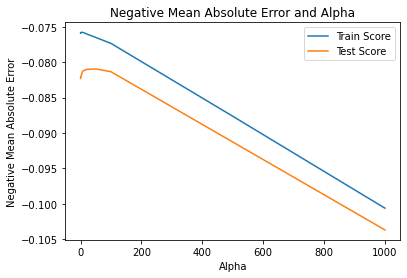

In [50]:
# Plotting the mean test and train scores with alphas

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title('Negative Mean Absolute Error and Alpha')
plt.legend(['Train Score', 'Test Score'], loc='upper right')
plt.show()

In [51]:
# Getting the optimum value for Alpha in Ridge

print("Optimum alpha for Ridge is", best_alpha_ridge)

Optimum alpha for Ridge is 50


In [52]:
# Displaying the scores in train and test sets

# r2 score for Ridge Regression
r2_train_ridge = r2_score(y_true=y_train, y_pred=y_train_pred_r)
r2_test_ridge = r2_score(y_true=y_test, y_pred=y_test_pred_r)

# Mean Squared Error (MSE) for Ridge Regression
MSE_train_ridge = mean_squared_error(y_train, y_train_pred_r)
MSE_test_ridge = mean_squared_error(y_test, y_test_pred_r)

# Mean Absolute Error (MAE) for Ridge Regression
MAE_train_ridge = mean_absolute_error(y_train, y_train_pred_r)
MAE_test_ridge = mean_absolute_error(y_test, y_test_pred_r)

# Root Mean Squared Error (RMSE) for Ridge Regression
RMSE_train_ridge = np.sqrt(MSE_train_ridge)
RMSE_test_ridge = np.sqrt(MSE_test_ridge)

print("Ridge Regression Model with alpha=50:\n","="*40)
print("\nScores for Train Set:")
print("R2 Score: ",r2_train_ridge)
print("MSE Score: ",MSE_train_ridge)
print("MAE Score: ",MAE_train_ridge)
print("RMSE Score: ",RMSE_train_ridge)

print("\nScores for Test Set:")
print("R2 Score: ",r2_test_ridge)
print("MSE Score: ",MSE_test_ridge)
print("MAE Score: ",MAE_test_ridge)
print("RMSE Score: ",RMSE_test_ridge)

Ridge Regression Model with alpha=50:

Scores for Train Set:
R2 Score:  0.9197662757946696
MSE Score:  0.012612037517869377
MAE Score:  0.0765276854045055
RMSE Score:  0.11230332816915702

Scores for Test Set:
R2 Score:  0.885161713208492
MSE Score:  0.018895505090551764
MAE Score:  0.09122978477124648
RMSE Score:  0.13746092204896548


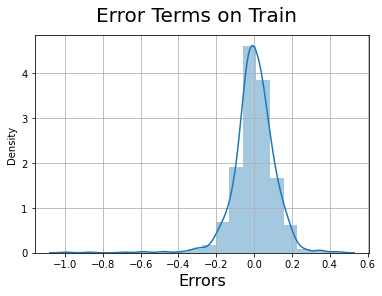

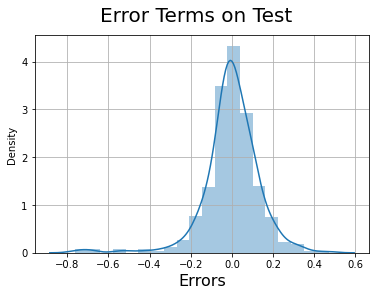

In [53]:
# Plotting Residual Analysis 

fig = plt.figure()
sns.distplot((y_train - y_train_pred_r), bins=20)
fig.suptitle('Error Terms on Train', fontsize=20)            # plot heading
plt.xlabel('Errors', fontsize=16)                   # X-label
plt.grid(True)
plt.show()

fig = plt.figure()
sns.distplot((y_test - y_test_pred_r), bins=20)
fig.suptitle('Error Terms on Test', fontsize=20)            # plot heading
plt.xlabel('Errors', fontsize=16)                   # X-label
plt.grid(True)
plt.show()

**The Error terms for Train and Test seems to be approximately normally distributed around 0.**

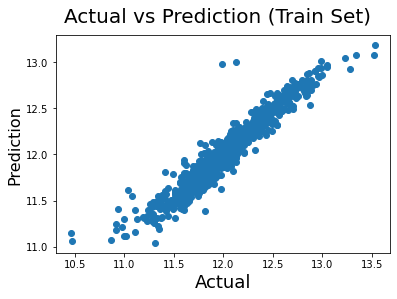

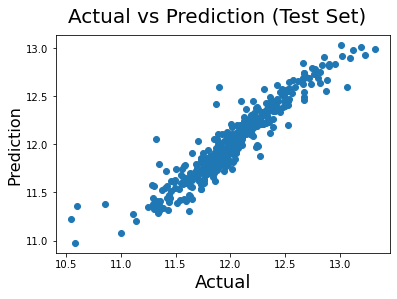

In [54]:
# Plotting actual vs prediction in train and test to understand the spread

fig = plt.figure()
plt.scatter(y_train, y_train_pred_r)
fig.suptitle('Actual vs Prediction (Train Set)', fontsize=20)     # Plot heading
plt.xlabel('Actual', fontsize=18)                     # X-label
plt.ylabel('Prediction', fontsize=16)                 # Y-label
plt.show()

fig = plt.figure()
plt.scatter(y_test, y_test_pred_r)
fig.suptitle('Actual vs Prediction (Test Set)', fontsize=20)     # Plot heading
plt.xlabel('Actual', fontsize=18)                     # X-label
plt.ylabel('Prediction', fontsize=16)                 # Y-label
plt.show()

### Lasso Regression

In [55]:
# Building Lasso Regression model

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso1 = Lasso()

lasso_model_cv = GridSearchCV(estimator=lasso1,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=5,
                       return_train_score=True,
                       verbose=1)

lasso_model_cv.fit(X_train_rfe, y_train)
best_alpha_lasso = lasso_model_cv.best_params_["alpha"]
lasso_final_model = lasso_model_cv.best_estimator_

lasso_final_model.fit(X_train_rfe, y_train)
y_train_pred_l = lasso_final_model.predict(X_train_rfe)
y_test_pred_l = lasso_final_model.predict(X_test_rfe)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [56]:
# Displaying mean scores rank wise
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])



,param_alpha,mean_train_score,mean_test_score,rank_test_score
1,0.001,-0.075971,-0.081432,1
0,0.0001,-0.075822,-0.082108,2
2,0.01,-0.084040,-0.087478,3
3,0.1,-0.154271,-0.155166,4
4,0.2,-0.229854,-0.230979,5
5,0.3,-0.295690,-0.296429,6
24,100,-0.310053,-0.310647,7
23,50,-0.310053,-0.310647,7
22,20,-0.310053,-0.310647,7
21,10.0,-0.310053,-0.310647,7


**According to the above output, the optimum value for Alpha is 0.001**

In [57]:
# Since Lasso has selected optimum Alpha value as 0.001, recreating the model with small alpha values
# This will be helpful to plot the Negative Mean Absolute Error

params = {'alpha': [0.0001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009]}

lasso1 = Lasso()

lasso_model_cv = GridSearchCV(estimator=lasso1,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=5,
                       return_train_score=True,
                       verbose=1)

lasso_model_cv.fit(X_train_rfe, y_train)
best_alpha_lasso = lasso_model_cv.best_params_["alpha"]
lasso_final_model = lasso_model_cv.best_estimator_

lasso_final_model.fit(X_train_rfe, y_train)
y_train_pred_l = lasso_final_model.predict(X_train_rfe)
y_test_pred_l = lasso_final_model.predict(X_test_rfe)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [58]:
# Displaying again the mean scores rank wise
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])


,param_alpha,mean_train_score,mean_test_score,rank_test_score
1,0.001,-0.075971,-0.081432,1
0,0.0001,-0.075822,-0.082108,2
2,0.002,-0.076818,-0.082443,3
3,0.003,-0.077695,-0.082679,4
4,0.004,-0.078431,-0.083028,5
5,0.005,-0.079367,-0.083635,6
6,0.006,-0.080344,-0.084305,7
7,0.007,-0.081240,-0.084996,8
8,0.008,-0.082183,-0.085809,9
9,0.009,-0.083114,-0.086659,10


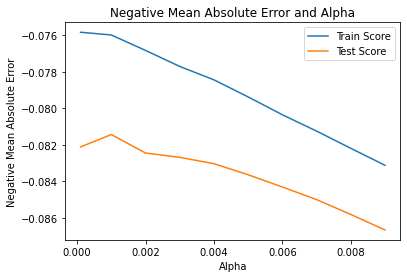

In [59]:
# Plotting the mean test and train scores with alphas in Lasso Regression

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title('Negative Mean Absolute Error and Alpha')
plt.legend(['Train Score', 'Test Score'], loc='upper right')
plt.show()

In [60]:
# Getting the optimum value for Alpha in Lasso Regression

print("Optimum alpha for Lasso is", best_alpha_lasso)

Optimum alpha for Lasso is 0.001


In [61]:
# Displaying the scores in train and test sets for Lasso Regression

# r2 score for Lasso Regression
r2_train_lasso = r2_score(y_true=y_train, y_pred=y_train_pred_l)
r2_test_lasso = r2_score(y_true=y_test, y_pred=y_test_pred_l)

# Mean Squared Error (MSE) for Lasso Regression
MSE_train_lasso = mean_squared_error(y_train, y_train_pred_l)
MSE_test_lasso = mean_squared_error(y_test, y_test_pred_l)

# Mean Absolute Error (MAE) for Lasso Regression
MAE_train_lasso = mean_absolute_error(y_train, y_train_pred_l)
MAE_test_lasso = mean_absolute_error(y_test, y_test_pred_l)

# Root Mean Squared Error (RMSE) for Lasso Regression
RMSE_train_lasso = np.sqrt(MSE_train_ridge)
RMSE_test_lasso = np.sqrt(MSE_test_ridge)

print("Lasso Regression Model with alpha=0.001:\n","="*40)
print("\nScores for Train Set:")
print("R2 Score: ",r2_train_lasso)
print("MSE Score: ",MSE_train_lasso)
print("MAE Score: ",MAE_train_lasso)
print("RMSE Score: ",RMSE_train_lasso)

print("\nScores for Test Set:")
print("R2 Score: ",r2_test_lasso)
print("MSE Score: ",MSE_test_lasso)
print("MAE Score: ",MAE_test_lasso)
print("RMSE Score: ",RMSE_test_lasso)

Lasso Regression Model with alpha=0.001:

Scores for Train Set:
R2 Score:  0.9220783927747972
MSE Score:  0.012248593013854506
MAE Score:  0.0761527631613061
RMSE Score:  0.11230332816915702

Scores for Test Set:
R2 Score:  0.8876701333878119
MSE Score:  0.018482769341945256
MAE Score:  0.09092234954831672
RMSE Score:  0.13746092204896548


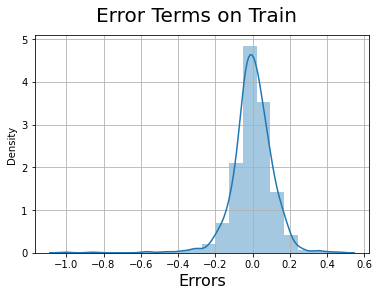

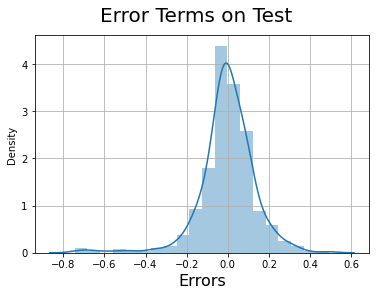

In [62]:
# Plotting Residual Analysis 

fig = plt.figure()
sns.distplot((y_train - y_train_pred_l), bins=20)
fig.suptitle('Error Terms on Train', fontsize=20)            # plot heading
plt.xlabel('Errors', fontsize=16)                   # X-label
plt.grid(True)
plt.show()

fig = plt.figure()
sns.distplot((y_test - y_test_pred_l), bins=20)
fig.suptitle('Error Terms on Test', fontsize=20)            # plot heading
plt.xlabel('Errors', fontsize=16)                   # X-label
plt.grid(True)
plt.show()

**The Error terms for Train and Test seems to be approximately normally distributed around 0.**

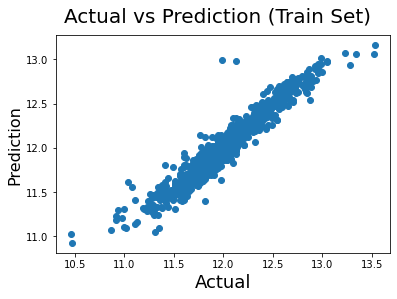

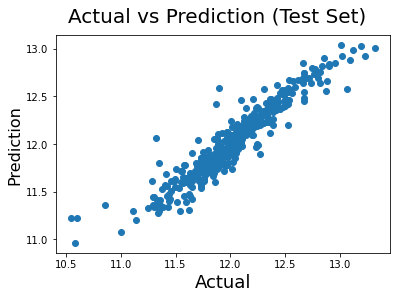

In [63]:
# Plotting actual vs prediction in train and test to understand the spread

fig = plt.figure()
plt.scatter(y_train, y_train_pred_l)
fig.suptitle('Actual vs Prediction (Train Set)', fontsize=20)     # Plot heading
plt.xlabel('Actual', fontsize=18)                     # X-label
plt.ylabel('Prediction', fontsize=16)                 # Y-label
plt.show()

fig = plt.figure()
plt.scatter(y_test, y_test_pred_l)
fig.suptitle('Actual vs Prediction (Test Set)', fontsize=20)     # Plot heading
plt.xlabel('Actual', fontsize=18)                     # X-label
plt.ylabel('Prediction', fontsize=16)                 # Y-label
plt.show()

### Comparing model coefficients

In [64]:
# Comparing coefficients from Ridge and Lasso

coefficients = pd.DataFrame(index=X_test_rfe.columns)

coefficients['Ridge (alpha=50)'] = ridge_final_model.coef_
coefficients['Lasso (alpha=0.001)'] = lasso_final_model.coef_
coefficients

,Ridge (alpha=50),Lasso (alpha=0.001)
MSSubClass,-0.024153,-0.026725
LotArea,0.028624,0.027536
OverallQual,0.070266,0.072340
OverallCond,0.049448,0.052744
YearBuilt,0.059776,0.067609
YearRemodAdd,0.023874,0.020710
BsmtExposure,0.022842,0.023414
BsmtFinSF1,0.045949,0.048439
BsmtUnfSF,0.017740,0.018063
1stFlrSF,0.052551,0.038160


In [65]:
# Converting SalePrice predicted values to its original scale(anti-log)

test_prediction = np.round(np.exp(y_test_pred_l)).astype(int)
print(test_prediction[:10])

[119223 192887 168541 206668 148455 288864 210871 286350 114153 165052]


### Final Model Selection

**Based on the R2 Scores from Ridge and Lasso, Lasso producing slightly better R2 than Ridge.**

**The MSE on test set is slightly lower in Lasso than Ridge. This tells us that Lasso Regression perform better on unseen data as compared to Ridge.**


In [66]:
coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False)

,Lasso (alpha=0.001)
MSZoning_RL,0.110563
GrLivArea,0.107530
MSZoning_RM,0.073679
OverallQual,0.072340
YearBuilt,0.067609
OverallCond,0.052744
MSZoning_FV,0.050305
BsmtFinSF1,0.048439
1stFlrSF,0.038160
2ndFlrSF,0.035621


In [67]:
coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False).index[:10]

Index(['MSZoning_RL', 'GrLivArea', 'MSZoning_RM', 'OverallQual', 'YearBuilt',
       'OverallCond', 'MSZoning_FV', 'BsmtFinSF1', '1stFlrSF', '2ndFlrSF'],
      dtype='object')

## Conclusion

**After creating and comparing the Ridge and Lasso Regression models, I reached to the following conclusion:**

- SalePrice is the target feature which we need to determine.


- RFE was used to select top 50 features out of 147 total features.


- The optimum alpha values selected by Ridge and Lasso using the GridSearchCV method are 50 and 0.001 respectively.


- Lasso Regression producing slightly better results than Ridge. So I have chosen Lasso as final model.


- Out of 50 features, top 10 important features contributing for better SalePrice are: 'MSZoning_RL', 'GrLivArea', 'MSZoning_RM', 'OverallQual', 'YearBuilt', 'OverallCond', 'MSZoning_FV', 'BsmtFinSF1', '1stFlrSF', '2ndFlrSF'


- The predicted value of SalePrice is transformed into it's original scale by performing antilog


## Subjective Questions

#### Question 1

**What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?**

In [68]:
# The optimal value of alpha for Ridge and Lasso Regression

print("Optimal alpha in Ridge: ",best_alpha_ridge)
print("Optimal alpha in Lasso: ",best_alpha_lasso)

Optimal alpha in Ridge:  50
Optimal alpha in Lasso:  0.001


**Creating Ridge and Lasso model with double alpha values.**

In [69]:
# Creating Ridge Model with double alpha value 50*2 = 100

ridge2 = Ridge(alpha=100)

ridge2.fit(X_train_rfe, y_train)

y_train_pred_r2 = ridge2.predict(X_train_rfe)
y_test_pred_r2 = ridge2.predict(X_test_rfe)

# Displaying the scores in train and test sets

# r2 score for Ridge Regression
r2_train_ridge2 = r2_score(y_true=y_train, y_pred=y_train_pred_r2)
r2_test_ridge2 = r2_score(y_true=y_test, y_pred=y_test_pred_r2)

# Mean Squared Error (MSE) for Ridge Regression
MSE_train_ridge2 = mean_squared_error(y_train, y_train_pred_r2)
MSE_test_ridge2 = mean_squared_error(y_test, y_test_pred_r2)

# Mean Absolute Error (MAE) for Ridge Regression
MAE_train_ridge2 = mean_absolute_error(y_train, y_train_pred_r2)
MAE_test_ridge2 = mean_absolute_error(y_test, y_test_pred_r2)

# Root Mean Squared Error (RMSE) for Ridge Regression
RMSE_train_ridge2 = np.sqrt(MSE_train_ridge2)
RMSE_test_ridge2 = np.sqrt(MSE_test_ridge2)

print("Ridge Regression Model with doubled alpha=100:\n","="*40)
print("\nScores for Train Set:")
print("R2 Score: ",r2_train_ridge2)
print("MSE Score: ",MSE_train_ridge2)
print("MAE Score: ",MAE_train_ridge2)
print("RMSE Score: ",RMSE_train_ridge2)

print("\nScores for Test Set:")
print("R2 Score: ",r2_test_ridge2)
print("MSE Score: ",MSE_test_ridge2)
print("MAE Score: ",MAE_test_ridge2)
print("RMSE Score: ",RMSE_test_ridge2)

Ridge Regression Model with doubled alpha=100:

Scores for Train Set:
R2 Score:  0.9171772754307903
MSE Score:  0.013019005660585274
MAE Score:  0.07714061780987087
RMSE Score:  0.11410085740512765

Scores for Test Set:
R2 Score:  0.8844972687493229
MSE Score:  0.01900483285928985
MAE Score:  0.09093041201805453
RMSE Score:  0.13785801702944175


In [70]:
# Viewing features with their coefficients for Ridge with doubled alpha i.e., 100

coefficients2 = pd.DataFrame(index=X_test_rfe.columns)

coefficients2['Ridge (alpha=100)'] = ridge2.coef_
coefficients2[['Ridge (alpha=100)']].sort_values(by='Ridge (alpha=100)', ascending=False).head(10)

,Ridge (alpha=100)
GrLivArea,0.079915
OverallQual,0.070144
YearBuilt,0.054284
1stFlrSF,0.051685
2ndFlrSF,0.049073
OverallCond,0.045547
BsmtFinSF1,0.044272
MSZoning_RL,0.038719
LotArea,0.029144
GarageArea,0.028748


In [71]:
# Top10 features selected by Ridge with doubled alpha

coefficients2[['Ridge (alpha=100)']].sort_values(by='Ridge (alpha=100)', ascending=False).index[:10]

Index(['GrLivArea', 'OverallQual', 'YearBuilt', '1stFlrSF', '2ndFlrSF',
       'OverallCond', 'BsmtFinSF1', 'MSZoning_RL', 'LotArea', 'GarageArea'],
      dtype='object')

In [72]:
print("Intercept: ",ridge2.intercept_)
print("Coefficients: \n",ridge2.coef_)

Intercept:  12.022188172224935
Coefficients: 
 [-0.01976282  0.02914411  0.07014433  0.0455474   0.05428352  0.02711455
  0.02230408  0.0442725   0.01648368  0.05168457  0.04907287  0.07991536
  0.02215589  0.02695314 -0.00557602  0.02874778  0.01286505  0.01603454
  0.01072349  0.03871888  0.00869741  0.00933669  0.01279051  0.01595104
 -0.00550311  0.01843313 -0.02282297 -0.01048631 -0.0081408  -0.00917982
  0.01808693 -0.00945688  0.01887243  0.01029826  0.02279481  0.00950406
 -0.01029907  0.01700784 -0.0021244   0.01343608 -0.00243886  0.00545468
  0.00916875  0.00265501  0.02206581  0.01517735  0.00669677  0.00945498
  0.0179281   0.00945498]


In [73]:
# Creating Lasso Model with double alpha value 0.001*2 = 0.002

lasso2 = Lasso(alpha=0.002)

lasso2.fit(X_train_rfe, y_train)

y_train_pred_l2 = lasso2.predict(X_train_rfe)
y_test_pred_l2 = lasso2.predict(X_test_rfe)

# Displaying the scores in train and test sets

# r2 score for Lasso Regression
r2_train_lasso2 = r2_score(y_true=y_train, y_pred=y_train_pred_l2)
r2_test_lasso2 = r2_score(y_true=y_test, y_pred=y_test_pred_l2)

# Mean Squared Error (MSE) for Lasso Regression
MSE_train_lasso2 = mean_squared_error(y_train, y_train_pred_l2)
MSE_test_lasso2 = mean_squared_error(y_test, y_test_pred_l2)

# Mean Absolute Error (MAE) for Lasso Regression
MAE_train_lasso2 = mean_absolute_error(y_train, y_train_pred_l2)
MAE_test_lasso2 = mean_absolute_error(y_test, y_test_pred_l2)

# Root Mean Squared Error (RMSE) for Lasso Regression
RMSE_train_lasso2 = np.sqrt(MSE_train_lasso2)
RMSE_test_lasso2 = np.sqrt(MSE_test_lasso2)

print("Lasso Regression Model with doubled alpha=0.002:\n","="*40)
print("\nScores for Train Set:")
print("R2 Score: ",r2_train_lasso2)
print("MSE Score: ",MSE_train_lasso2)
print("MAE Score: ",MAE_train_lasso2)
print("RMSE Score: ",RMSE_train_lasso2)

print("\nScores for Test Set:")
print("R2 Score: ",r2_test_lasso2)
print("MSE Score: ",MSE_test_lasso2)
print("MAE Score: ",MAE_test_lasso2)
print("RMSE Score: ",RMSE_test_lasso2)

Lasso Regression Model with doubled alpha=0.002:

Scores for Train Set:
R2 Score:  0.9169093432670837
MSE Score:  0.013061122246028371
MAE Score:  0.07726698418637133
RMSE Score:  0.11428526696835586

Scores for Test Set:
R2 Score:  0.887269307632054
MSE Score:  0.018548721258505086
MAE Score:  0.0902369190298715
RMSE Score:  0.13619369023014644


In [74]:
# Viewing features with their coefficients for Lasso with doubled alpha i.e., 0.002

coefficients3 = pd.DataFrame(index=X_test_rfe.columns)

coefficients3['Lasso (alpha=0.002)'] = lasso2.coef_
coefficients3[['Lasso (alpha=0.002)']].sort_values(by='Lasso (alpha=0.002)', ascending=False).head(10)

,Lasso (alpha=0.002)
GrLivArea,0.124117
OverallQual,0.078942
YearBuilt,0.067951
OverallCond,0.052876
BsmtFinSF1,0.046312
MSZoning_RL,0.036387
LotArea,0.027810
1stFlrSF,0.026236
GarageArea,0.025874
FireplaceQu,0.024315


In [75]:
# Top10 features selected by Lasso with doubled alpha

coefficients3[['Lasso (alpha=0.002)']].sort_values(by='Lasso (alpha=0.002)', ascending=False).index[:10]

Index(['GrLivArea', 'OverallQual', 'YearBuilt', 'OverallCond', 'BsmtFinSF1',
       'MSZoning_RL', 'LotArea', '1stFlrSF', 'GarageArea', 'FireplaceQu'],
      dtype='object')

In [76]:
print("Intercept: ",lasso2.intercept_)
print("Coefficients: \n",lasso2.coef_)

Intercept:  12.022188172224935
Coefficients: 
 [-0.02090358  0.02780978  0.07894204  0.05287612  0.06795078  0.02175356
  0.02119674  0.04631215  0.01544448  0.02623565  0.01696763  0.12411717
  0.02034115  0.02431505  0.          0.02587389  0.00529352  0.012715
  0.00913375  0.03638673  0.00857247  0.00637882  0.01041255  0.01121493
 -0.00246617  0.01832144 -0.01988793 -0.00675115 -0.00534803 -0.00400101
  0.01657117 -0.00583059  0.02079722  0.00893206  0.0228491   0.00978875
 -0.00849593  0.01549066  0.          0.00858677 -0.00157863  0.
  0.00699224 -0.          0.01879474  0.01077605  0.00553899  0.00956797
  0.01578095  0.00715883]


**Question 2**

**You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?**

Solution included in the pdf.

---

**Question 3**

**After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?**

In [77]:
# Top 5 most important features in the Lasso model

coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False).index[:5]

Index(['MSZoning_RL', 'GrLivArea', 'MSZoning_RM', 'OverallQual', 'YearBuilt'], dtype='object')

In [78]:
# Let's drop these features and recreate the Lasso model

X_train_rfe_2 = X_train_rfe.drop(['MSZoning_RL', 'GrLivArea', 'MSZoning_RM', 'OverallQual', 'YearBuilt'], axis=1)
X_test_rfe_2 = X_test_rfe.drop(['MSZoning_RL', 'GrLivArea', 'MSZoning_RM', 'OverallQual', 'YearBuilt'], axis=1)

# Creating Lasso Model after removing the top 5 features

lasso3 = Lasso(alpha=0.001)

lasso3.fit(X_train_rfe_2, y_train)

y_train_pred_l3 = lasso3.predict(X_train_rfe_2)
y_test_pred_l3 = lasso3.predict(X_test_rfe_2)


In [79]:
print("Intercept: ",lasso3.intercept_)
print("Coefficients: \n",lasso3.coef_)

Intercept:  12.022188172224935
Coefficients: 
 [-0.02585789  0.02928056  0.03823631  0.04943363  0.02987857  0.0609447
  0.02708572  0.12699406  0.14335918  0.02039011  0.03874886 -0.02070133
  0.03673975  0.03211418  0.00106819  0.00221008  0.0169565   0.01445194
  0.02452208  0.00165595  0.01848924 -0.02549037 -0.01590257 -0.00628503
 -0.00544404  0.03376842 -0.01021215  0.03369056  0.01860922  0.03000661
  0.01527594 -0.01019419  0.01886304 -0.          0.0195367   0.
  0.00068105  0.00773175  0.02304627  0.0619129   0.03238538  0.00589783
  0.01386634  0.02198649  0.00848434]


In [80]:
# Viewing features with their coefficients for Lasso after removing the top 5

coefficients4 = pd.DataFrame(index=X_test_rfe_2.columns)

coefficients4['Lasso'] = lasso3.coef_
coefficients4[['Lasso']].sort_values(by='Lasso', ascending=False).head(5)

,Lasso
2ndFlrSF,0.143359
1stFlrSF,0.126994
Foundation_PConc,0.061913
BsmtFinSF1,0.060945
YearRemodAdd,0.049434


In [81]:
coefficients4[['Lasso']].sort_values(by='Lasso', ascending=False).index[:5]

Index(['2ndFlrSF', '1stFlrSF', 'Foundation_PConc', 'BsmtFinSF1',
       'YearRemodAdd'],
      dtype='object')

**Question 4**

**How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?**

Solution included in the pdf.